### Transmission results plot

In [27]:
import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.lines import Line2D

df = pd.read_csv("transmission/base_results_output_transmission.csv")
df

,BetweenNode,AndNode,Period,transmissionInvCap_MW,transmissionInvCapMax_MW,transmissionInstalledCap_MW,transmissionInstalledCapMax_MW,DiscountedInvestmentCost_Euro,transmissionExpectedAnnualVolume_GWh,ExpectedAnnualLosses_GWh
0,Switzerland,Austria,2020-2025,0.000000e+00,20000.0,1200.000000,1200.0,0.000000,4275.593395,128.267802
1,Switzerland,Austria,2025-2030,0.000000e+00,20000.0,1200.000000,1200.0,0.000000,4955.449954,148.663499
2,Switzerland,Austria,2030-2035,8.386853e-07,20000.0,1200.000001,2200.0,0.386709,6240.347135,187.210414
3,Switzerland,Austria,2035-2040,7.425117e-08,20000.0,1200.000001,2200.0,0.025184,5764.581465,172.937444
4,Switzerland,Austria,2040-2045,6.339521e-07,20000.0,1200.000002,3200.0,0.154462,4922.340073,147.670202
...,...,...,...,...,...,...,...,...,...,...
2555,SørvestD,NO2,2035-2040,1.502120e-04,20000.0,0.001009,5000.0,31.277952,0.006236,0.000187
2556,SørvestD,NO2,2040-2045,1.375988e-02,20000.0,0.014769,5000.0,1477.694201,0.082878,0.002486
2557,SørvestD,NO2,2045-2050,7.472940e-07,20000.0,0.014770,5000.0,0.055600,0.083469,0.002504
2558,SørvestD,NO2,2050-2055,2.926208e-07,20000.0,0.014770,5000.0,0.014208,0.078180,0.002345


In [28]:
# Set 2050 
df = df[df["Period"] == "2050-2055"]

# Remove 0-connections
df = df[df["transmissionInstalledCap_MW"] > 1].reset_index(drop=True)
df

,BetweenNode,AndNode,Period,transmissionInvCap_MW,transmissionInvCapMax_MW,transmissionInstalledCap_MW,transmissionInstalledCapMax_MW,DiscountedInvestmentCost_Euro,transmissionExpectedAnnualVolume_GWh,ExpectedAnnualLosses_GWh
0,Switzerland,Austria,2050-2055,1.126077e-05,20000.0,1200.000024,3200.0,1.240483,4194.853368,125.845601
1,CzechR,Austria,2050-2055,3.624169e-07,20000.0,1899.999951,1900.0,0.014629,13840.921320,415.227640
2,Germany,Austria,2050-2055,2.159334e-06,20000.0,8199.999729,8200.0,0.000000,32024.868761,960.746063
3,Hungary,Austria,2050-2055,3.616716e-07,20000.0,2799.999952,2800.0,0.012389,21327.503016,639.825090
4,Italy,Austria,2050-2055,3.358271e-07,20000.0,2294.997765,2295.0,0.041315,13675.319151,410.259575
...,...,...,...,...,...,...,...,...,...,...
102,HelgoländerBucht,Netherlands,2050-2055,8.507153e-08,20000.0,4999.999932,5000.0,0.001594,30890.025505,926.700765
103,HelgoländerBucht,Germany,2050-2055,0.000000e+00,20000.0,6566.000000,6566.0,0.000000,26571.614402,797.148432
104,Nordsøen,Denmark,2050-2055,4.243249e-07,20000.0,4999.999868,5000.0,0.005645,29527.179130,885.815374
105,SørvestE,NO2,2050-2055,6.256219e-07,20000.0,2339.571834,5000.0,0.015671,10422.539083,312.676172


Import lat/lon

In [29]:
latlon = pd.read_csv("../EMPIRE_extension/Output/nodes.csv").drop(columns=["geometry"])
latlon["Node"] = latlon["Node"].apply(lambda s: s.replace(" ", ""))
latlon

,Node,Longitude,Latitude
0,Austria,14.430000,47.460000
1,BosniaH,17.810000,44.060000
2,Belgium,4.600000,50.720000
3,Bulgaria,25.250000,42.710000
4,Switzerland,8.150000,46.820000
...,...,...,...
62,NordavindA,32.012239,71.113248
63,NordavindD,18.808962,71.450117
64,NordavindC,20.019911,71.728123
65,VestavindE,3.853030,59.109692


#### Europe Plot

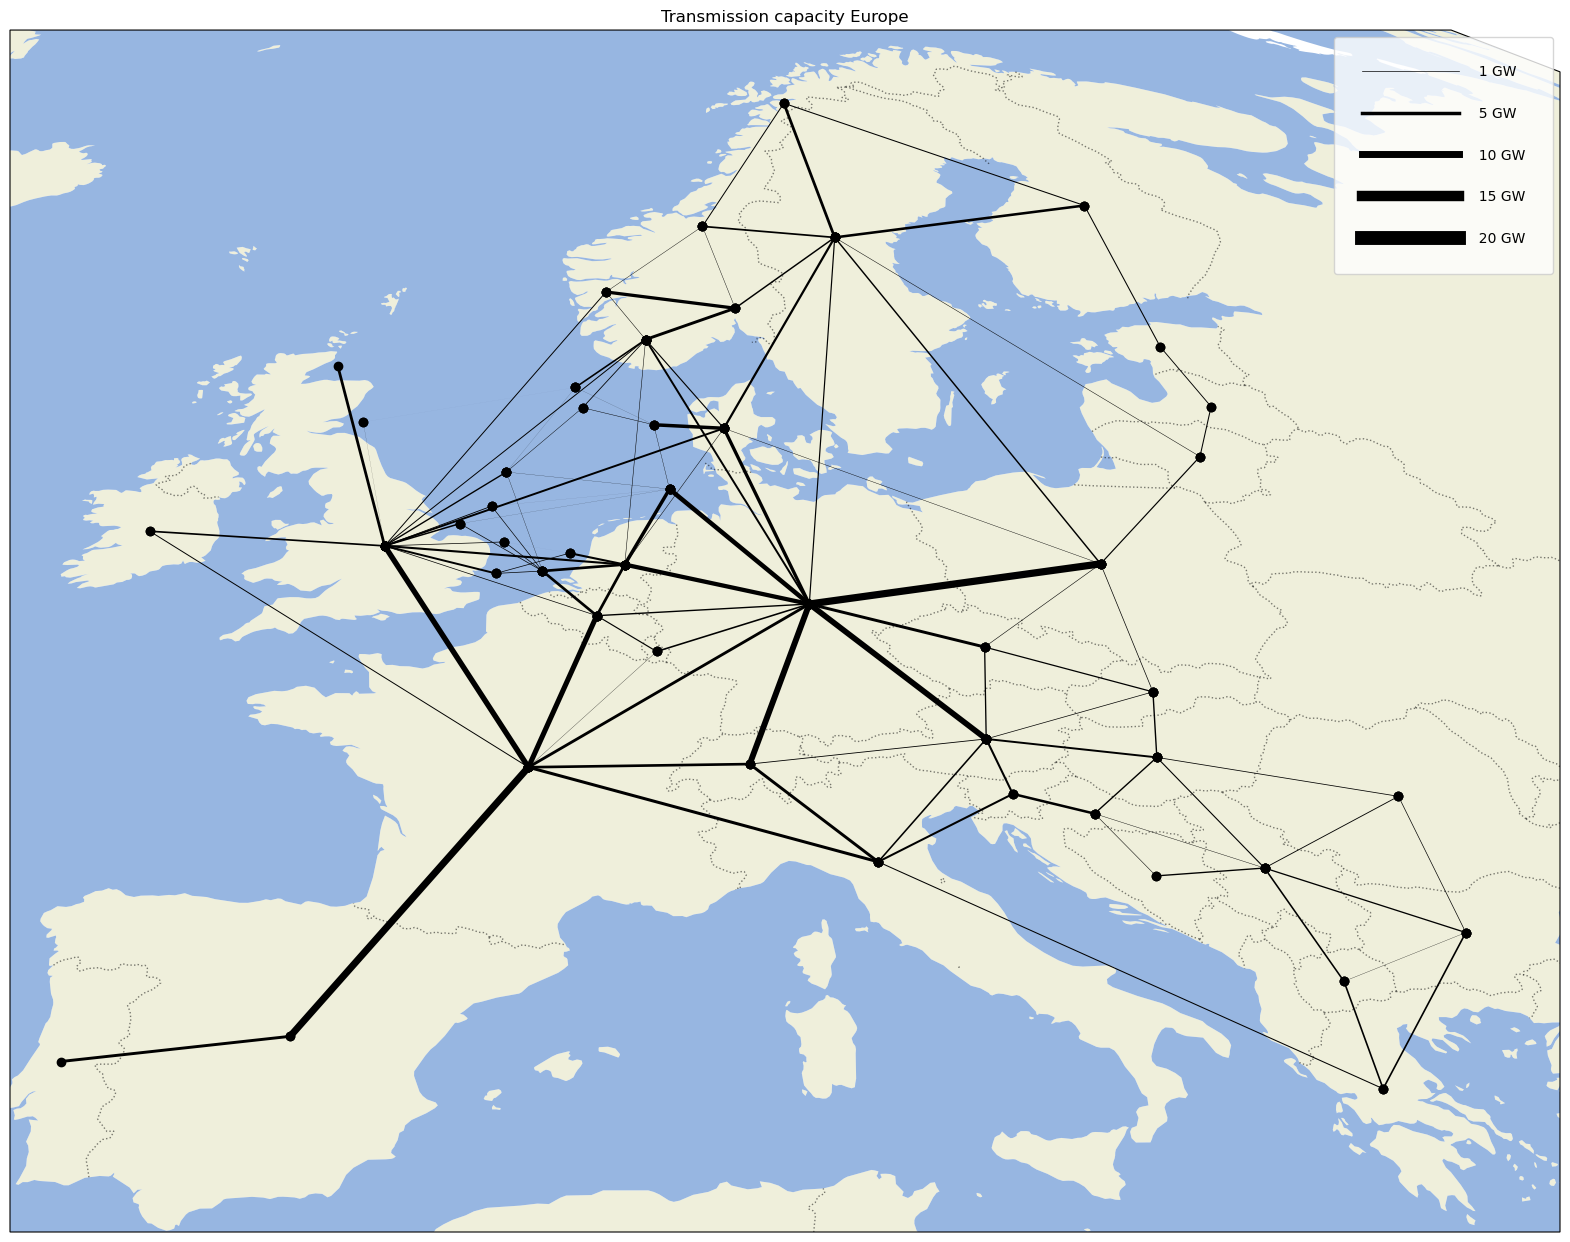

In [30]:
custom_lines = [Line2D([0], [0], color='black', linewidth=0.5),
                Line2D([0], [0], color='black', linewidth=2.5),
                Line2D([0], [0], color='black', linewidth=5),
                Line2D([0], [0], color='black', linewidth=7.5),
                Line2D([0], [0], color='black', linewidth=10)]
fig = plt.figure(figsize=(20,20))
ax = plt.axes(projection=ccrs.Orthographic())
ax.add_feature(cartopy.feature.BORDERS.with_scale('50m'), linestyle=':', alpha=.5)
ax.add_feature(cartopy.feature.LAND.with_scale('50m'))
ax.add_feature(cartopy.feature.OCEAN.with_scale('50m'))
for _, df_row in df.iterrows():
    plt.plot([latlon[latlon["Node"] == df_row["BetweenNode"]]["Longitude"].values[0], latlon[latlon["Node"] == df_row["AndNode"]]["Longitude"].values[0]],\
              [latlon[latlon["Node"] == df_row["BetweenNode"]]["Latitude"].values[0], latlon[latlon["Node"] == df_row["AndNode"]]["Latitude"].values[0]],
                color = 'black',
                linewidth = df_row["transmissionInstalledCap_MW"]/2000,
                marker = 'o',
                transform=ccrs.Geodetic())
ax.set_extent([-9, 25, 36, 72], crs=ccrs.PlateCarree())
ax.legend(custom_lines, ['  1 GW', '  5 GW', '  10 GW','  15 GW','  20 GW'], borderpad=2, labelspacing=2, handlelength=7)
plt.title('Transmission capacity Europe')
plt.show()

#### North Sea Plot

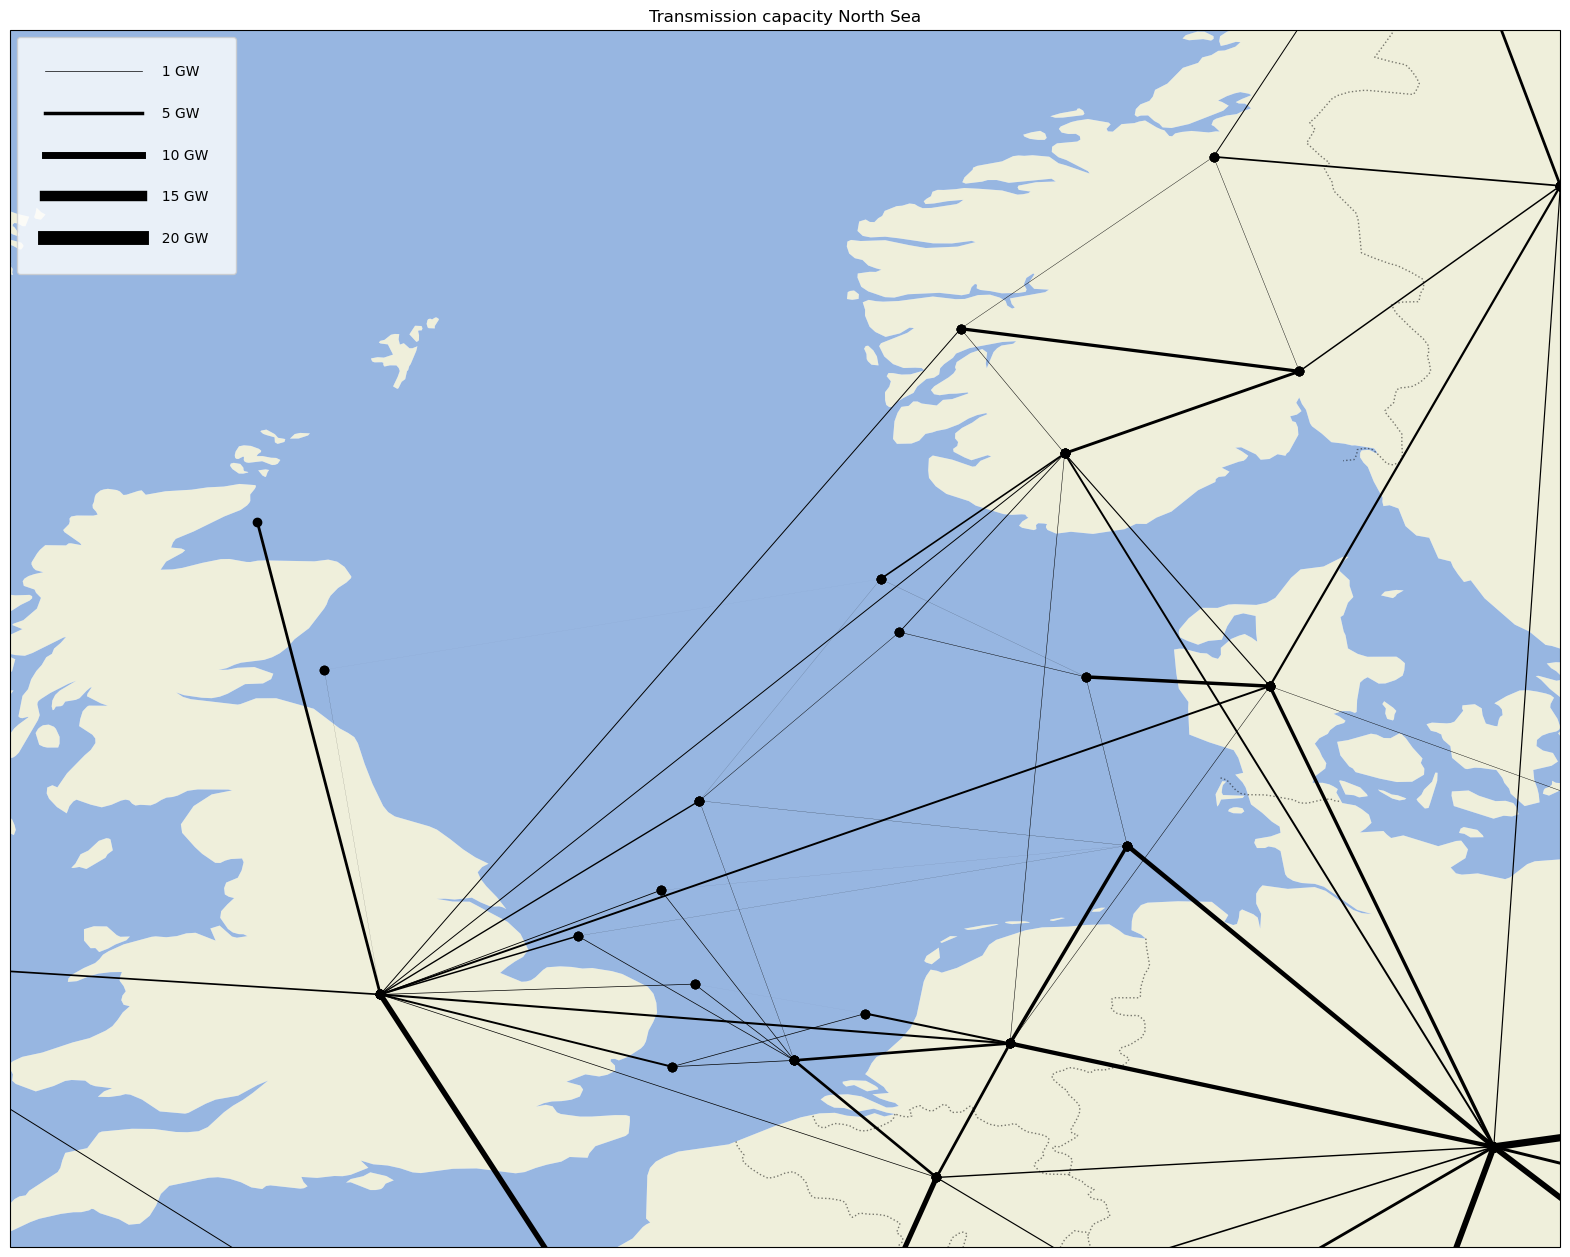

In [31]:
custom_lines = [Line2D([0], [0], color='black', linewidth=0.5),
                Line2D([0], [0], color='black', linewidth=2.5),
                Line2D([0], [0], color='black', linewidth=5),
                Line2D([0], [0], color='black', linewidth=7.5),
                Line2D([0], [0], color='black', linewidth=10)]
fig = plt.figure(figsize=(20,20))
ax = plt.axes(projection=ccrs.Orthographic())
ax.add_feature(cartopy.feature.BORDERS.with_scale('50m'), linestyle=':', alpha=.5)
ax.add_feature(cartopy.feature.LAND.with_scale('50m'))
ax.add_feature(cartopy.feature.OCEAN.with_scale('50m'))
for _, df_row in df.iterrows():
    plt.plot([latlon[latlon["Node"] == df_row["BetweenNode"]]["Longitude"].values[0], latlon[latlon["Node"] == df_row["AndNode"]]["Longitude"].values[0]],\
              [latlon[latlon["Node"] == df_row["BetweenNode"]]["Latitude"].values[0], latlon[latlon["Node"] == df_row["AndNode"]]["Latitude"].values[0]],
                color = 'black',
                linewidth = df_row["transmissionInstalledCap_MW"]/2000,
                marker = 'o',
                transform=ccrs.Geodetic())
ax.set_extent([-5, 11, 50, 65], crs=ccrs.PlateCarree())
ax.legend(custom_lines, ['  1 GW', '  5 GW', '  10 GW','  15 GW','  20 GW'], borderpad=2, labelspacing=2, handlelength=7)
plt.title('Transmission capacity North Sea')
plt.show()